In [4]:
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [5]:
drown_training = "Underwater_Drowning/train"
training_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True, rotation_range=30, height_shift_range=0.2, fill_mode='nearest')

drown_validation = "Underwater_Drowning/valid"
validation_datagen = ImageDataGenerator(rescale = 1./255)

drown_train_generator = training_datagen.flow_from_directory(drown_training,target_size=(224,224),class_mode='categorical',batch_size = 64)

drown_validation_generator = validation_datagen.flow_from_directory(drown_validation, target_size=(224,224), class_mode='categorical', batch_size= 16)


Found 5889 images belonging to 2 classes.
Found 727 images belonging to 2 classes.


In [6]:
model_drown = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)), tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='softmax')])
model_drown.compile(loss='categorical_crossentropy',
optimizer=Adam(lr=0.0001),
metrics=['acc'])
history = model_drown.fit(drown_train_generator,steps_per_epoch = 15,epochs = 50,validation_data = drown_validation_generator,validation_steps = 15)

2023-04-04 11:44:52.989533: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-04-04 11:44:52.989623: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: craterdeo
2023-04-04 11:44:52.989640: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: craterdeo
2023-04-04 11:44:52.989888: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 520.61.5
2023-04-04 11:44:52.989921: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 520.61.5
2023-04-04 11:44:52.989930: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 520.61.5
2023-04-04 11:44:52.990569: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network L

Epoch 1/50
15/15 [==============================] - 32s 2s/step - loss: 0.4582 - acc: 0.8427 - val_loss: 0.2712 - val_acc: 0.9167
Epoch 2/50
15/15 [==============================] - 25s 2s/step - loss: 0.3329 - acc: 0.8781 - val_loss: 0.3043 - val_acc: 0.8958
Epoch 3/50
15/15 [==============================] - 21s 1s/step - loss: 0.3138 - acc: 0.8656 - val_loss: 0.2755 - val_acc: 0.8958
Epoch 4/50
15/15 [==============================] - 19s 1s/step - loss: 0.2968 - acc: 0.8540 - val_loss: 0.2909 - val_acc: 0.8833
Epoch 5/50
15/15 [==============================] - 19s 1s/step - loss: 0.2637 - acc: 0.8751 - val_loss: 0.2357 - val_acc: 0.8958
Epoch 6/50
15/15 [==============================] - 20s 1s/step - loss: 0.2572 - acc: 0.8396 - val_loss: 0.1958 - val_acc: 0.9125
Epoch 7/50
15/15 [==============================] - 19s 1s/step - loss: 0.2062 - acc: 0.9008 - val_loss: 0.1832 - val_acc: 0.9125
Epoch 8/50
15/15 [==============================] - 20s 1s/step - loss: 0.1512 - acc: 0.94

In [7]:
model_drown.save('drowning_detection2.h5')

In [8]:
def detect(str,flag):
    if(flag == True):
        return "Detected " + str
    
    else:
        return "Didn't detect " + str

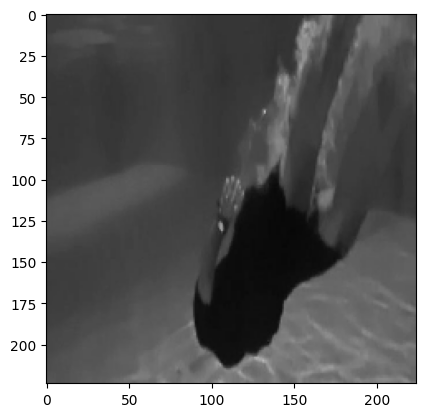

1/1 [==============================] - 0s 94ms/step
Didn't detect Drowning


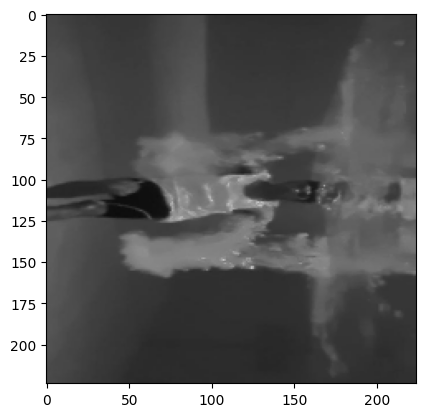

1/1 [==============================] - 0s 26ms/step
Detected Drowning


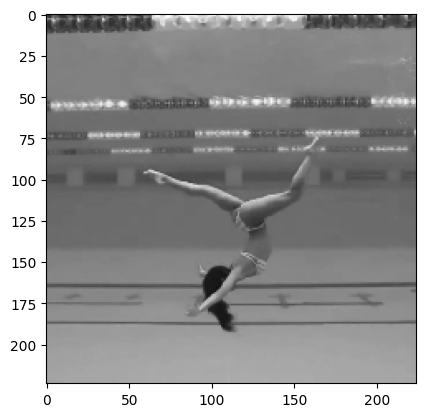

1/1 [==============================] - 0s 27ms/step
Didn't detect Drowning


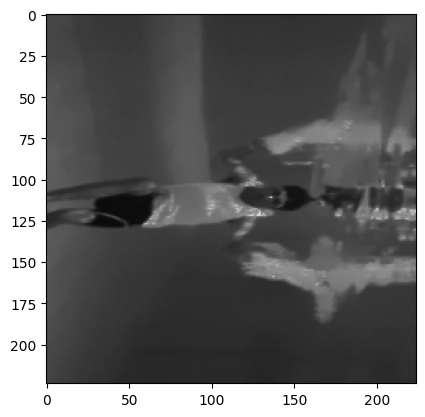

1/1 [==============================] - 0s 25ms/step
Detected Drowning


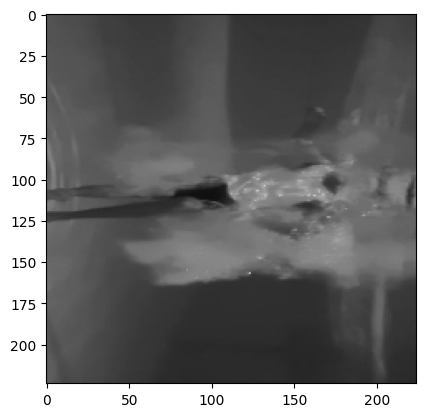

1/1 [==============================] - 0s 29ms/step
Detected Drowning


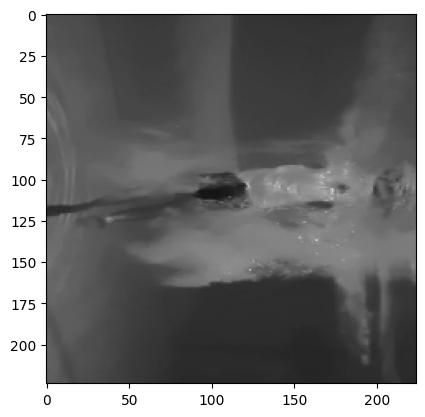

1/1 [==============================] - 0s 25ms/step
Detected Drowning


In [9]:
import numpy as np
import os
from matplotlib import pyplot as plt
path = 'Underwater_Drowning/test'
for i in os.listdir(path):
    img = image.load_img(path + '/' + i, target_size = (224,224))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255
    classes = model_drown.predict(x)
    fire_flag = detect("Drowning",np.argmax(classes[0]) == 0 )
    print(fire_flag)